# The Spark Foundation Gratuate Rotational Intership Program
# GRIP :- Data Science and Business Analytics
## Task 2 :- Prediction using K means algorithm
## Objective :- Predict the optimum number of clusters and represent it visually
### Performed by :- Ganesh Tamhane


# Import Libraries 

In [1]:
import pandas as pd  ## pandas library used for read the file
import numpy as np    ## numpy library used for calculations
import warnings
warnings.filterwarnings("ignore")  ## warning library used For Ignore the warnings
from sklearn import datasets
import seaborn as sns     # for plt te graph 

# Import Dataset 

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Ceck top some columns
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#Check last columns 
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### Checking Information 

In [5]:
#Check information about dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
#Description about Data
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# EDA - Exploratory Data Analysis

### Checking Missing Value 

In [7]:
#Check the missing value is present or not using isnull()
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

##### There is no present any mssing Value

In [8]:
iris_df_Final=iris_df.copy()  #Take the copy 

In [9]:
samples = iris_df.values # get all row and columne with header 
samples

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Check the Outlier


<AxesSubplot:>

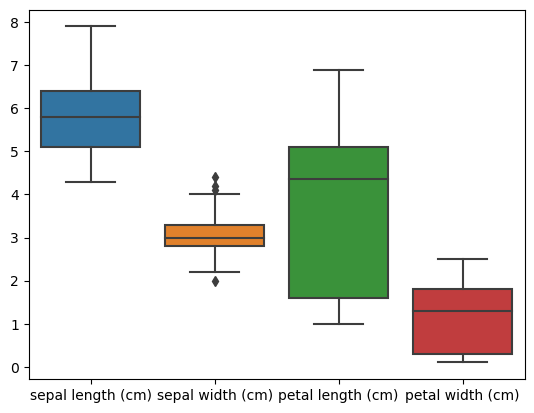

In [10]:
sns.boxplot(data=iris_df)

##### Hare Outlier are present so we remove it using winsorising technique

In [11]:
q1 = iris_df['sepal width (cm)'].quantile(0.25)
q3 = iris_df['sepal width (cm)'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

4.05

In [12]:
q1 = iris_df['sepal width (cm)'].quantile(0.25)
q3 = iris_df['sepal width (cm)'].quantile(0.75)
iqr = q3-q1 #Interquartile range

Lower_limit = q3-1.5*iqr 
Lower_limit

2.55

In [13]:
iris_df['sepal width (cm)']=np.where(iris_df['sepal width (cm)'] > upper_limit,upper_limit,iris_df['sepal width (cm)']) # upper limit

In [14]:
iris_df['sepal width (cm)']=np.where(iris_df['sepal width (cm)'] < Lower_limit,Lower_limit,iris_df['sepal width (cm)']) # upper limit

<AxesSubplot:>

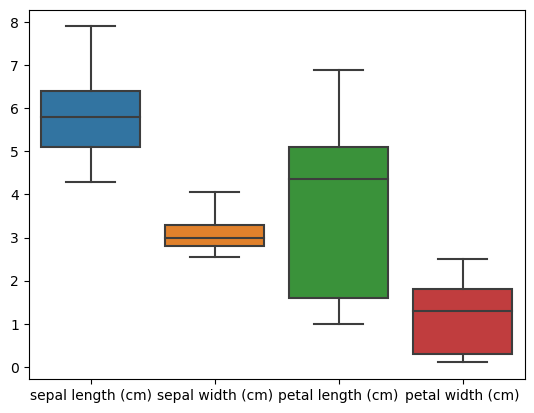

In [15]:
sns.boxplot(data=iris_df)

In [16]:
SSE=[]   # within-cluster sum-of-squares ( empty list)
SSE

[]

In [17]:
from sklearn.cluster import KMeans  #Import the Kmeans algorithm

ks = range(1,6)   #ks=1,2,3,4,5
SSE = [] # within-cluster sum-of-squares ( empty list)


#k=ks=

for k in ks:  # ks = k = 1,2,3,4,5
    # Create a KMeans instance with k clusters:
    
    model = KMeans(n_clusters=k) # k =1,2,3,4,5

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    SSE.append(model.inertia_)  # variance or SSE 
    # Inertia: Sum of distances of samplesto their closest cluster center
    
    # Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1, 2, 3]].valuesx = iris_df.iloc[:, [0, 1, 2, 3]].values

In [18]:
SSE

[681.3706,
 152.3479517603579,
 78.85144142614601,
 57.22847321428571,
 46.461172672672674]

### Elbow Method 

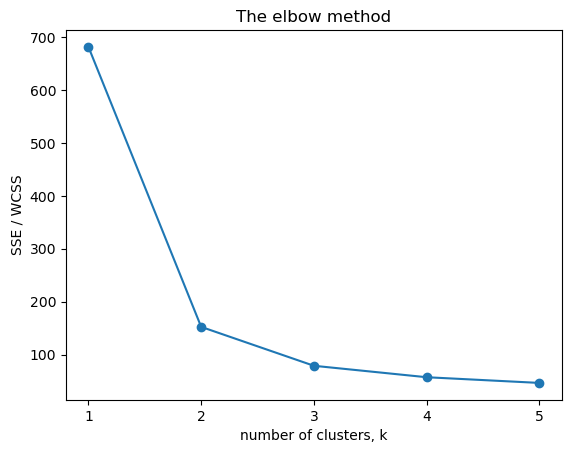

In [19]:
import matplotlib.pyplot as plt    ## matplot library used to show the graph
%matplotlib inline
# Plot ks vs inertias
plt.plot(ks, SSE, '-o') # -o is point in graph to identify the cluster
plt.title('The elbow method')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE / WCSS')
plt.xticks(ks) # to get exact number of cluster without decimal
plt.show()

We also clearly see the above graph is called 'The elbow method' the optimum clusters is where the elbow occure.This is when the within cluster sum of squares dosent't decrease significantly with every iteration.

From the above k-means clusters we choose the number of cluster as "3"

# Model or Algorithm 

In [20]:
## Build the model of K means algorithm
model = KMeans(n_clusters=3,max_iter=100)

In [21]:
iris_df_Final['Cluster_Made'] = model.fit_predict(samples)
iris_df_Final.head()  ## It show top 5 entries

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster_Made
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Final Customer Centroid 

In [22]:
model.cluster_centers_   ## find cluster centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [23]:
iris_df_Final.head()   ## Check final 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster_Made
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
iris_df_Final.Cluster_Made.value_counts(ascending=False)    ##Count the final values

1    62
0    50
2    38
Name: Cluster_Made, dtype: int64

In [25]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

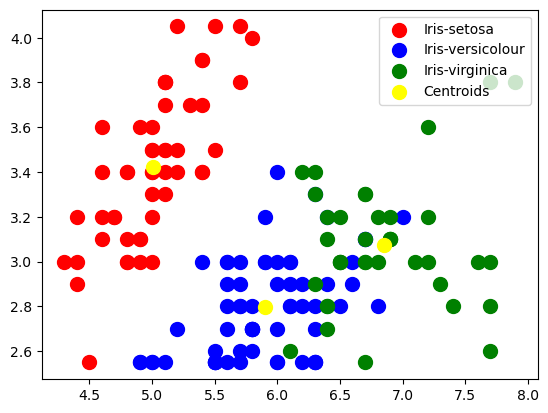

In [26]:
# Visualising the clusters - On the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Conclusion 

The optimum number of clusters are "*3*"

#### Thank you  